In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [283]:
df = pd.read_csv('dataset.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


# Preprocessing the data

In [284]:
df = df[
    df['Currency'].str.contains(r'UAH|USD', na=False)
]

df['Currency'].unique()


array(['USD\tUnited States dollar', 'UAH\tUkrainian hryvnia'],
      dtype=object)

In [285]:
df["Developer"] = (df["MainBranch"] == "I am a developer by profession").astype(int)
df["NotDeveloper"] = 1 - df["Developer"]
df.drop("MainBranch", axis=1, inplace=True)
df.head()

,ResponseId,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Developer,NotDeveloper
367,368,65 years or older,"Independent contractor, freelancer, or self-em...",Remote,Apples,Contribute to open-source projects;School or a...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN,0,1
389,390,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,...,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,1,0
398,399,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,1,0
410,411,45-54 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby;Contribute to open-source projects;Boots...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",On the job training,NaN,NaN,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,1,0
416,417,35-44 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Contribute to open-source projects;Freelance/c...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,20.0,20.0,15.0,0.0,Too long,Neither easy nor difficult,170000.0,8.0,1,0


In [286]:
print(df["Age"].unique())
for i in df["Age"].unique():
    df[i] = (df["Age"] == i).astype(int)
df.drop("Age", axis=1, inplace=True)

['65 years or older' '25-34 years old' '45-54 years old' '35-44 years old'
 '18-24 years old' '55-64 years old' 'Prefer not to say'
 'Under 18 years old']


In [287]:
# print(df["Employment"].unique())
employment = df["Employment"].unique()
unique_employment = set()
for i in employment:
    for j in i.split(";"):
        unique_employment.add(j)
# print(unique_employment)
def full_time(str):
    if 'Student, full-time' in str.split(";") or 'Employed, full-time' in str.split(";"):
        return 1
    return 0
def part_time(str):
    if 'Student, part-time' in str.split(";") or 'Employed, part-time' in str.split(";"):
        return 1
    return 0
def student(str):
    if 'Student, full-time' in str.split(";") or 'Student, part-time' in str.split(";"):
        return 1
    return 0
def freelancer(str):
    if "Independent contractor, freelancer, or self-employed" in str.split(";"):
        return 1
    return 0
def retired(str):
    if "Retired" in str.split(";"):
        return 1
    return 0
df["Full-time"] = df["Employment"].apply(full_time)
df["Part-time"] = df["Employment"].apply(part_time)
df["Student"] = df["Employment"].apply(student)
df["Freelancer"] = df["Employment"].apply(freelancer)
df["Retired"] = df["Employment"].apply(retired)

print(df.columns)
df.drop("Employment", axis=1, inplace=True)

Index(['ResponseId', 'Employment', 'RemoteWork', 'Check', 'CodingActivities',
       'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode',
       ...
       '35-44 years old', '18-24 years old', '55-64 years old',
       'Prefer not to say', 'Under 18 years old', 'Full-time', 'Part-time',
       'Student', 'Freelancer', 'Retired'],
      dtype='object', length=127)


In [288]:
df["In-person"] = df["RemoteWork"].isin(["In-person", "Hybrid (some remote, some in-person)"]).astype(int)
df["Remote"] = df["RemoteWork"].isin(["Remote", "Hybrid (some remote, some in-person)"]).astype(int)
print(df["Remote"])
print(df["In-person"])
df.drop("RemoteWork", axis=1, inplace=True)

367      1
389      1
398      1
410      1
416      1
        ..
65261    1
65268    1
65269    1
65270    1
65288    1
Name: Remote, Length: 12401, dtype: int64
367      0
389      0
398      0
410      0
416      0
        ..
65261    1
65268    0
65269    0
65270    0
65288    0
Name: In-person, Length: 12401, dtype: int64


In [289]:
df["CodingActivities"] = df["CodingActivities"].fillna("")
def hobby(str):
    if 'Hobby' in str.split(";"):
        return 1
    return 0
def freelance(str):
    if not str:
        return 0
    if 'Freelance/contract work' in str.split(";"):
        return 1
    return 0
def open_source(str):
    if not str:
        return 0
    if 'Contribute to open-source projects' in str.split(";"):
        return 1
    return 0
def bootstrapping(str):
    if not str:
        return 0
    if "Bootstrapping a business" in str.split(";"):
        return 1
    return 0
def academic(str):
    if not str:
        return 0
    if "School or academic work" in str.split(";"):
        return 1
    return 0
def pro_development(str):    
    if not str:
        return 0
    if "Professional development or self-paced learning from online courses" in str.split(";"):
        return 1
    return 0
def dont_code(str):    
    if not str:
        return 0
    if "I don’t code outside of work" in str.split(";"):
        return 1
    return 0
# print(df["CodingActivities"])
for i in df["CodingActivities"]:
    if isinstance(i, float):
        print(i)
df["Hobby"] = df["CodingActivities"].apply(hobby)
df["Open source"] = df["CodingActivities"].apply(open_source)
df["Academic"] = df["CodingActivities"].apply(academic)
df.drop("CodingActivities", axis=1, inplace=True)

In [290]:
for i in df["EdLevel"].unique():
    df[i] = (df["EdLevel"] == i).astype(int)
print(df.columns)
df.drop("EdLevel", axis=1, inplace=True)

Index(['ResponseId', 'Check', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       ...
       'Open source', 'Academic',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'],
      dtype='object', length=137)


In [291]:
def fill_in(column):
    df[column] = df[column].fillna("")
    lst = df[column].unique()
    for index, row in df.iterrows():
        value = df.loc[index, column]
        if value not in df.columns:
            df[value] = 0
        df.loc[index, value] = 1
    if "" in df.columns:
        df.drop("", axis=1, inplace=True)
fill_in("DevType")
print(df.columns.unique())

Index(['ResponseId', 'Check', 'LearnCode', 'LearnCodeOnline', 'TechDoc',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence',
       ...
       'Project manager', 'DevOps specialist', 'Scientist',
       'Data or business analyst', 'Designer', 'Database administrator',
       'Data engineer', 'Developer Advocate', 'Hardware Engineer',
       'Marketing or sales professional'],
      dtype='object', length=169)


In [292]:
fill_in("OrgSize")

In [293]:
# df['OrgSize'].unique()

category_map = {
    'Just me - I am a freelancer, sole proprietor, etc.': 'Small',
    '2 to 9 employees': 'Small',
    '10 to 19 employees': 'Small',
    '20 to 99 employees': 'Small',
    '100 to 499 employees': 'Medium',
    '500 to 999 employees': 'Medium',
    '1,000 to 4,999 employees': 'Large',
    '5,000 to 9,999 employees': 'Large',
    '10,000 or more employees': 'Large',
    'I don’t know': 'Unknown'
}

df['OrgSize'] = df['OrgSize'].map(category_map)

df['Small'] = (df['OrgSize'] == 'Small').astype(int)
df['Medium'] = (df['OrgSize'] == 'Medium').astype(int)
df['Large'] = (df['OrgSize'] == 'Large').astype(int)
df['Unknown'] = (df['OrgSize'] == 'Unknown').astype(int)
cols_to_drop = list(category_map.keys())

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

df.columns.tolist()

['ResponseId',
 'Check',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackAsyncWantToWorkWith',
 'OfficeStackAsyncAdmired',
 'Office

In [294]:
df["Bachelor Degree"]=df["Bachelor’s degree (B.A., B.S., B.Eng., etc.)"]
df['Master Degree']=df["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"]
df['Professional Degree']=df['Professional degree (JD, MD, Ph.D, Ed.D, etc.)']
df['College/university study']=df['Some college/university study without earning a degree']
df.drop('Some college/university study without earning a degree', axis=1)

,ResponseId,Check,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,Hardware Engineer,Marketing or sales professional,Small,Medium,Large,Unknown,Bachelor Degree,Master Degree,Professional Degree,College/university study
367,368,Apples,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,API document(s) and/or SDK document(s);User gu...,15,9,Academic researcher,Small,I have some influence,...,0,0,1,0,0,0,0,0,0,1
389,390,Apples,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,7,7,Student,Small,I have some influence,...,0,0,1,0,0,0,0,0,0,1
398,399,Apples,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,38,30,"Developer, full-stack",Large,I have little or no influence,...,0,0,0,0,1,0,0,0,0,1
410,411,Apples,On the job training,NaN,NaN,39,15,"Developer, full-stack",Small,I have a great deal of influence,...,0,0,1,0,0,0,0,0,1,0
416,417,Apples,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,21,17,"Developer, back-end",Medium,I have some influence,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65261,65262,Apples,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;Coding sessions (live or record...,NaN,4,2,"Developer, full-stack",Small,I have a great deal of influence,...,0,0,1,0,0,0,0,0,0,1
65268,65269,Apples,Books / Physical media;Other online resources ...,Technical documentation;Interactive tutorial;V...,API document(s) and/or SDK document(s);User gu...,9,5,"Developer, full-stack",Large,I have some influence,...,0,0,0,0,1,0,1,0,0,0
65269,65270,Apples,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,28,25,"Senior Executive (C-Suite, VP, etc.)",Medium,I have a great deal of influence,...,0,0,0,1,0,0,0,0,0,1
65270,65271,Apples,Books / Physical media;Colleague;On the job tr...,NaN,NaN,41,25,Research & Development role,Large,I have little or no influence,...,0,0,0,0,1,0,0,1,0,0


In [295]:
df['AI-powered search (free)'] = df['ProfessionalQuestion'] \
    .str.contains(r'AI-powered search\s*\(free\)', regex=True, na=False) \
    .astype(int)

df['AI-powered search (paid)'] = df['ProfessionalQuestion'] \
    .str.contains(r'AI-powered search\s*\(paid\)', regex=True, na=False) \
    .astype(int)

df.drop('ProfessionalQuestion', axis=1)


,ResponseId,Check,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,Small,Medium,Large,Unknown,Bachelor Degree,Master Degree,Professional Degree,College/university study,AI-powered search (free),AI-powered search (paid)
367,368,Apples,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,API document(s) and/or SDK document(s);User gu...,15,9,Academic researcher,Small,I have some influence,...,1,0,0,0,0,0,0,1,0,0
389,390,Apples,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,7,7,Student,Small,I have some influence,...,1,0,0,0,0,0,0,1,1,0
398,399,Apples,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,38,30,"Developer, full-stack",Large,I have little or no influence,...,0,0,1,0,0,0,0,1,0,0
410,411,Apples,On the job training,NaN,NaN,39,15,"Developer, full-stack",Small,I have a great deal of influence,...,1,0,0,0,0,0,1,0,0,0
416,417,Apples,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,21,17,"Developer, back-end",Medium,I have some influence,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65261,65262,Apples,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;Coding sessions (live or record...,NaN,4,2,"Developer, full-stack",Small,I have a great deal of influence,...,1,0,0,0,0,0,0,1,0,0
65268,65269,Apples,Books / Physical media;Other online resources ...,Technical documentation;Interactive tutorial;V...,API document(s) and/or SDK document(s);User gu...,9,5,"Developer, full-stack",Large,I have some influence,...,0,0,1,0,1,0,0,0,0,0
65269,65270,Apples,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,28,25,"Senior Executive (C-Suite, VP, etc.)",Medium,I have a great deal of influence,...,0,1,0,0,0,0,0,1,0,0
65270,65271,Apples,Books / Physical media;Colleague;On the job tr...,NaN,NaN,41,25,Research & Development role,Large,I have little or no influence,...,0,0,1,0,0,1,0,0,0,0


In [296]:
df['InUkraine'] = (df['Country'] == 'Ukraine').astype(int)
df = df.drop(columns=['Country'])
print(df[['InUkraine']].value_counts())

InUkraine
0            10270
1             2131
Name: count, dtype: int64


In [297]:
df['DevType'].unique()

array(['Academic researcher', 'Student', 'Developer, full-stack',
       'Developer, back-end',
       'Developer, embedded applications or devices',
       'Engineer, site reliability', 'Developer, front-end',
       'Engineering manager', 'Developer, mobile', 'Product manager',
       'Developer, QA or test', '', 'System administrator',
       'Developer, desktop or enterprise applications',
       'Research & Development role', 'Other (please specify):',
       'Security professional',
       'Data scientist or machine learning specialist',
       'Developer Experience', 'Cloud infrastructure engineer',
       'Developer, AI', 'Developer, game or graphics', 'Blockchain',
       'Senior Executive (C-Suite, VP, etc.)', 'Educator',
       'Project manager', 'DevOps specialist', 'Scientist',
       'Data or business analyst', 'Designer', 'Database administrator',
       'Data engineer', 'Developer Advocate', 'Hardware Engineer',
       'Marketing or sales professional'], dtype=object)

In [298]:
def sigma_rule(df, col, threshold = 3):
    mean = df[col].mean()
    sigma = df[col].std()
    print(mean)
    print(sigma)
    print(mean -threshold * sigma)
    print(mean +threshold * sigma)
    outlier_indices = set(
        df.index[(df[col] < mean -threshold * sigma) | (df[col] > mean + threshold * sigma)]
    )
    return outlier_indices
outlier_indeces = sigma_rule(df, "ConvertedCompYearly")
outliers = [df.loc[i, "ConvertedCompYearly"] for i in outlier_indeces]
print(outliers)
# print(df["ConvertedCompYearly"])
# print(df["ConvertedCompYearly"].quantile(0.1))
low = [i for i in df["ConvertedCompYearly"] if i < 120000]
print(len(low))
df = df.drop(index=outlier_indeces)

128257.35614443797
170489.070924932
-383209.856630358
639724.568919234
[1000000.0, 800000.0, 798000.0, 4936778.0, 2000000.0, 945000.0, 1000000.0, 700000.0, 1500000.0, 1200000.0, 650000.0, 750000.0, 900000.0, 1000000.0, 1000000.0, 800000.0, 700000.0, 720000.0, 750000.0, 1200000.0, 700000.0, 650000.0, 750000.0, 1500000.0, 1000000.0, 850000.0, 800000.0, 1500000.0, 700000.0, 675000.0, 1000000.0, 1200000.0, 650000.0, 810000.0, 740517.0, 950000.0, 750000.0, 9000000.0, 1300000.0, 650000.0, 670000.0, 2000000.0, 750000.0, 1750000.0, 1900000.0, 1332930.0, 750000.0, 750000.0, 750000.0, 1200000.0, 750000.0, 750000.0, 750000.0, 875000.0]
3591


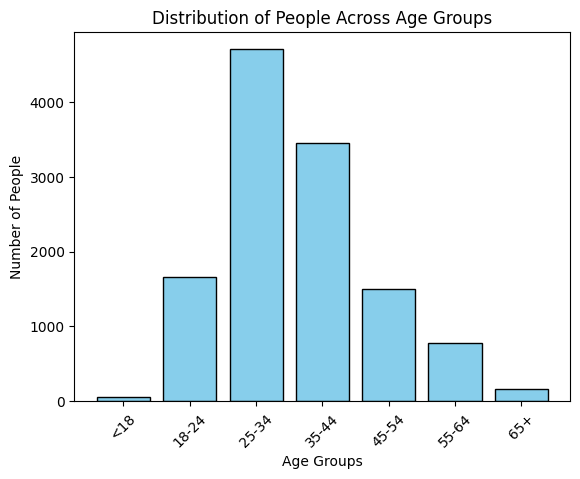

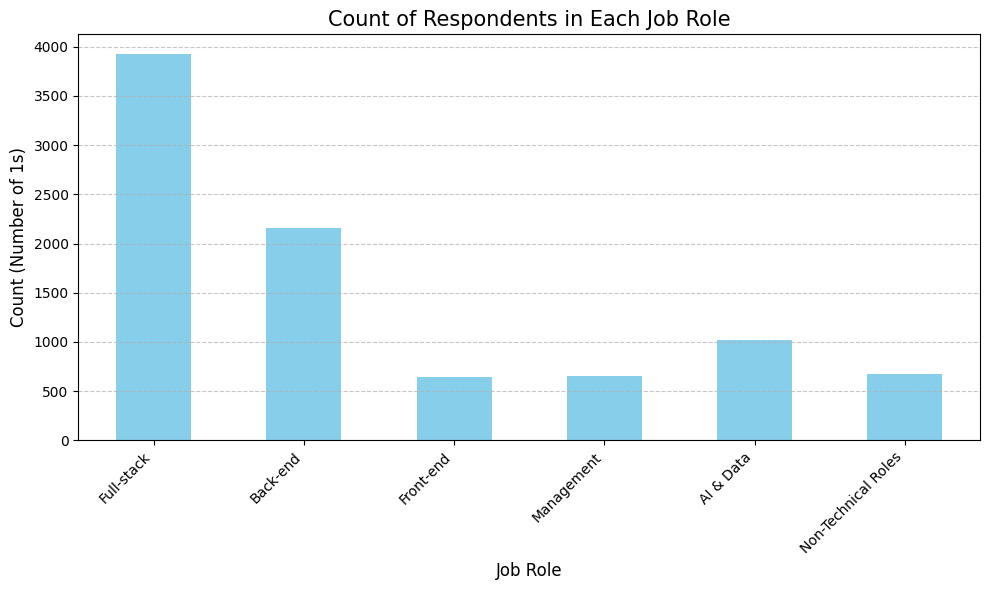

In [299]:
df65 = df[df["65 years or older"] == 1]
dfunder18 = df[df["Under 18 years old"] == 1]
df18 = df[df["18-24 years old"] == 1]
df25 = df[df["25-34 years old"] == 1]
df35 = df[df["35-44 years old"] == 1]
df45 = df[df["45-54 years old"] == 1]
df55 = df[df["55-64 years old"] == 1]
lengths = [len(dfunder18), len(df18), len(df25), len(df35), len(df45), len(df55), len(df65)]
age_groups = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
plt.bar(age_groups, lengths, color='skyblue', edgecolor='black')
plt.xlabel("Age Groups")
plt.ylabel("Number of People")
plt.title("Distribution of People Across Age Groups")
plt.xticks(rotation=45)
plt.show()
df = df[df["Under 18 years old"] == 0]
df = df[df["65 years or older"] == 0]
df.drop("Under 18 years old", axis=1)
df.drop("65 years or older", axis=1)

df = df[df["Part-time"] == 0]
df.drop("Part-time", axis=1)
df1=pd.read_csv('data.csv')

df["Full-stack"] = df["DevType"].isin(["Developer, full-stack"]).astype(int)
df["Back-end"] = df["DevType"].isin(["Developer, back-end"]).astype(int)
df["Front-end"] = df["DevType"].isin(["Developer, front-end"]).astype(int)
# df["Management"] = df["DevType"].isin(["Developer, front-end"]).astype(int)
df["Management"] = df[["Engineering manager", "Product manager", "Project manager", "Senior Executive (C-Suite, VP, etc.)"]].sum(axis=1)
df["AI & Data"] = df[["Data scientist or machine learning specialist", "Developer, AI", "Research & Development role",
        "Scientist", "Data or business analyst", "Data engineer"]].sum(axis=1)
df["Non-Technical Roles"]=df[["Developer Advocate","Marketing or sales professional", "Developer, QA or test","Designer", "Educator", "Marketing or sales professional", "Other (please specify):"]].sum(axis=1)

jobs = ["Full-stack", "Back-end", "Front-end", "Management", "AI & Data" , "Non-Technical Roles"]
lengths = [sum(df[i]) for i in jobs]

jobs = ["Full-stack", "Back-end", "Front-end", 
        "Management", "AI & Data", "Non-Technical Roles"]

job_counts = df[jobs].sum()

plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Respondents in Each Job Role', fontsize=15)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Count (Number of 1s)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [300]:
print(df['AIComplex'].unique())
binary_map = {
    'Bad at handling complex tasks': 1,
    'Neither good or bad at handling complex tasks': 1,
    'Very well at handling complex tasks': 1,
    'Very poor at handling complex tasks': 0,
    'Good, but not great at handling complex tasks': 0
}

df['AITaskHandling'] = df['AIComplex'].map(binary_map)

mode_value = df['AITaskHandling'].mode()[0]  
df['AITaskHandling'] = df['AITaskHandling'].fillna(mode_value)
df['AITaskHandling'] = df['AITaskHandling'].astype(int)
df['AITaskHandling'].unique()



[nan 'Bad at handling complex tasks'
 'Neither good or bad at handling complex tasks'
 'Very poor at handling complex tasks'
 'Good, but not great at handling complex tasks'
 'Very well at handling complex tasks']


array([1, 0])

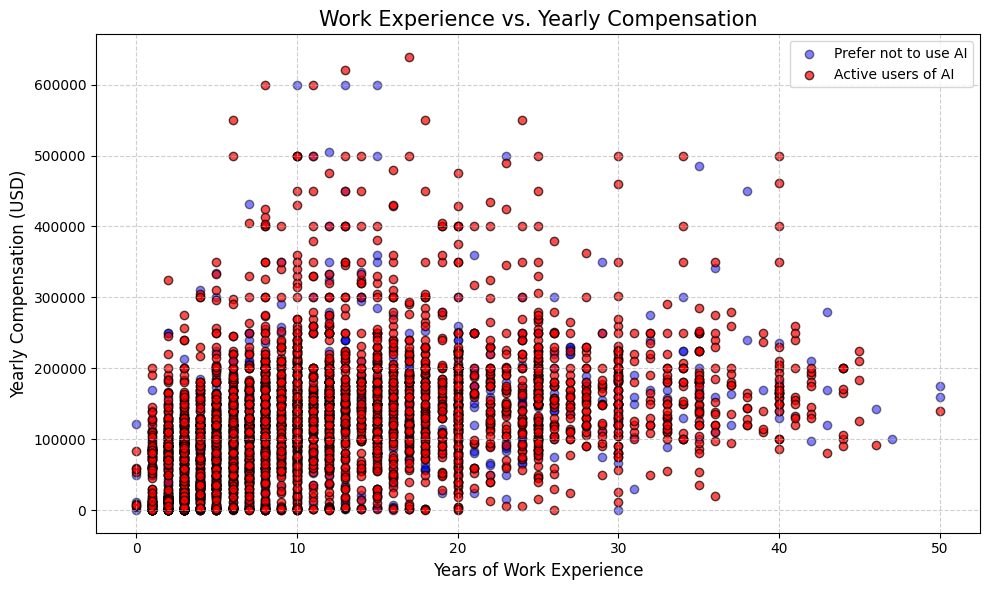

In [301]:

plt.figure(figsize=(10, 6))

plt.scatter(
    x=df[df['AITaskHandling'] != 1]['WorkExp'], 
    y=df[df['AITaskHandling'] != 1]['ConvertedCompYearly'],
    alpha=0.5,
    color='blue',
    edgecolor='black',
    label='Prefer not to use AI'
)

# Highlight Ukraine points in red
plt.scatter(
    x=df[df['AITaskHandling'] == 1]['WorkExp'], 
    y=df[df['AITaskHandling'] == 1]['ConvertedCompYearly'],
    alpha=0.7,
    color='red',
    edgecolor='black',
    label='Active users of AI'
)

plt.title('Work Experience vs. Yearly Compensation', fontsize=15)
plt.xlabel('Years of Work Experience', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()  # Show the legend
plt.tight_layout()
plt.show()

In [302]:

table_vars = [
    'ConvertedCompYearly',
    'YearsCodePro',
    'WorkExp',
    'JobSat',
    'Developer',
    'Under 18 years old',
    '25-34 years old',
    '45-54 years old',
    '35-44 years old',
    '55-64 years old',
    'Remote',
    'Academic',
    'Job Training',
    'Books/Physical media',
    'Online Courses',
    'Coding Bootcamp',
    'Certification videos',
    'Technical documentation',
    'Blogs',
    'AI-powered search (free)',
    'AI-powered search (paid)',
    'Small',
    'Medium',
    'InUkraine',
    'Bachelor Degree',
    'Master Degree',
    'Professional Degree',
    'College/university study',
    'Infrastructure & Operations',
    'Management',
    'AI & Data',
    'Back-end',
    'Front-end'
]

df_cols = df.columns.tolist()

vars_not_in_df = set(table_vars) - set(df_cols)

cols_not_in_table = set(df_cols) - set(table_vars)

print("Змінні з таблиці, яких немає в df:")
for v in sorted(vars_not_in_df):
    print("  -", v)

print("\nКолонки в df, яких немає у списку таблиці:")
for c in sorted(cols_not_in_table):
    print("  -", c)


Змінні з таблиці, яких немає в df:
  - Blogs
  - Books/Physical media
  - Certification videos
  - Coding Bootcamp
  - Infrastructure & Operations
  - Job Training
  - Online Courses
  - Technical documentation

Колонки в df, яких немає у списку таблиці:
  - 18-24 years old
  - 65 years or older
  - AIAcc
  - AIBen
  - AIChallenges
  - AIComplex
  - AIEthics
  - AINextLess integrated
  - AINextMore integrated
  - AINextMuch less integrated
  - AINextMuch more integrated
  - AINextNo change
  - AISearchDevAdmired
  - AISearchDevHaveWorkedWith
  - AISearchDevWantToWorkWith
  - AISelect
  - AISent
  - AITaskHandling
  - AIThreat
  - AIToolCurrently Using
  - AIToolInterested in Using
  - AIToolNot interested in Using
  - Academic researcher
  - Associate degree (A.A., A.S., etc.)
  - Bachelor’s degree (B.A., B.S., B.Eng., etc.)
  - Blockchain
  - BuildvsBuy
  - BuyNewTool
  - Check
  - Cloud infrastructure engineer
  - CompTotal
  - Currency
  - Data engineer
  - Data or business analyst


In [303]:
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', 0)
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', 51)
df['YearsCodePro'].unique()

array(['30', '15', '17', '4', '11', '23', '18', '10', '3', '40', '26',
       '25', 0, '9', '22', '1', '20', '7', '13', '19', '2', '35', '5',
       '8', '24', '37', '6', '12', '28', '38', '14', '45', '27', '21', 51,
       '34', '29', '16', '32', nan, '31', '39', '43', '42', '33', '36',
       '44', '41', '46', '47', '48'], dtype=object)

In [304]:
df['AISelect']=df['AISelect'].replace('Yes', 1).replace('No, but I plan to soon', 0).replace("No, and I don't plan to", 0)
df['AISelect'].unique()

array([ 0.,  1., nan])

In [305]:
df['LearnCode'].unique()
df['Job Training'] = df['LearnCode'].str.contains('On the job training', na=False).astype(int)
df['Online Courses'] = df['LearnCode'].str.contains('Online Courses', na=False).astype(int)
print(df[['LearnCode', 'Job Training', 'Online Courses']].head())

                                             LearnCode  Job Training  \
398  Books / Physical media;Colleague;On the job tr...             1   
410                                On the job training             1   
416  Books / Physical media;Other online resources ...             0   
426  Books / Physical media;Online Courses or Certi...             0   
428  Books / Physical media;On the job training;Oth...             1   

     Online Courses  
398               0  
410               0  
416               1  
426               1  
428               1  


# Modelling

manually dropping the variables 

In [306]:

table_vars = [
    'ConvertedCompYearly',
    'YearsCodePro',
    'WorkExp',
    'JobSat',
    'Developer',
    # 'Under 18 years old',
    # '25-34 years old',
    '45-54 years old',
    '35-44 years old',
    '55-64 years old',
    'Remote',
    'Academic',
    'Job Training',
    'Online Courses',
    'AI-powered search (free)',
    # 'AI-powered search (paid)',
    'Small',
    'Medium',
    'InUkraine',
    'Bachelor Degree',
    'Master Degree',
    'Professional Degree',
    # 'College/university study',
    'Management',
    # 'AI & Data',
    'Back-end',
    'Front-end'
]
model_df = df[table_vars].copy()
model_df = model_df.dropna()
model_df


,ConvertedCompYearly,YearsCodePro,WorkExp,JobSat,Developer,45-54 years old,35-44 years old,55-64 years old,Remote,Academic,...,AI-powered search (free),Small,Medium,InUkraine,Bachelor Degree,Master Degree,Professional Degree,Management,Back-end,Front-end
398,195000.0,30,30.0,5.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
416,170000.0,17,17.0,8.0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
426,50000.0,4,4.0,8.0,1,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
428,230000.0,11,15.0,8.0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
431,85000.0,23,25.0,8.0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41148,60000.0,15,20.0,10.0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
41149,145000.0,8,8.0,3.0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
41161,50000.0,5,5.0,7.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
41164,94000.0,13,13.0,8.0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [307]:

model_df = model_df.apply(pd.to_numeric, errors='coerce')

y = model_df['ConvertedCompYearly']
X = model_df
X=X.drop('ConvertedCompYearly', axis=1)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.404
Model:                             OLS   Adj. R-squared:                  0.401
Method:                  Least Squares   F-statistic:                     135.6
Date:                 Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                         17:56:09   Log-Likelihood:                -52964.
No. Observations:                 4226   AIC:                         1.060e+05
Df Residuals:                     4204   BIC:                         1.061e+05
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      8.18e+04   6902.447     11.851      0.000    6.83e+04    9.53e+04
YearsCodePro              2525.2856    302.657      8.344      0.000    1931.919    3118.652
WorkExp                   1144.1376    307.653      3.719      0.000     540.975    1747.300
JobSat                    2049.8738    493.326      4.155      0.000    1082.695    3017.052
Developer                 1.543e+04   4639.352      3.326      0.001    6336.274    2.45e+04
45-54 years old          -2.757e+04   5070.884     -5.437      0.000   -3.75e+04   -1.76e+04
35-44 years old           -852.4923   2992.405     -0.285      0.776   -6719.188    5014.203
55-64 years old          -5.959e+04   7471.690     -7.976      0.000   -7.42e+04   -4.49e+04
Remote                    1.453e+04   3432.190      4.234      0.000    7801.366    2.13e+04
Academic                 -1.359e+04   3947.230     -3.443      0.001   -2.13e+04   -5851.193
Job Training              -865.2351   2159.998     -0.401      0.689   -5099.972    3369.502
Online Courses           -1.852e+04   2175.699     -8.514      0.000   -2.28e+04   -1.43e+04
AI-powered search (free) -1.759e+04   4510.068     -3.900      0.000   -2.64e+04   -8747.241
Small                    -3.895e+04   2520.935    -15.450      0.000   -4.39e+04    -3.4e+04
Medium                   -2.409e+04   2588.762     -9.306      0.000   -2.92e+04    -1.9e+04
InUkraine                -9.397e+04   3223.886    -29.147      0.000      -1e+05   -8.76e+04
Bachelor Degree           1.123e+04   2914.712      3.852      0.000    5513.535    1.69e+04
Master Degree             1.637e+04   3359.586      4.872      0.000    9780.422     2.3e+04
Professional Degree       2.755e+04   5767.316      4.778      0.000    1.62e+04    3.89e+04
Management                3.891e+04   4761.919      8.172      0.000    2.96e+04    4.82e+04
Back-end                  1.385e+04   2637.689      5.249      0.000    8674.842     1.9e+04
Front-end                 1545.4747   4555.610      0.339      0.734   -7385.929    1.05e+04
==============================================================================
Omnibus:                     1486.732   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8107.593
Skew:                           1.585   Prob(JB):                         0.00
Kurtosis:                       9.000   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logit Model

In [308]:

table_vars = [
    'YearsCodePro',
    'JobSat',
    'Developer',
    '25-34 years old',
    '45-54 years old',
    '35-44 years old',
    'Remote',
    'Academic',
    'Online Courses',
    'AI-powered search (paid)',
    'InUkraine',
    'Management',
    'Back-end',
    'Front-end'
]
model_df = df[table_vars].copy()
model_df = model_df.dropna()
model_df = model_df.apply(pd.to_numeric, errors='coerce')


In [309]:
y = model_df['Remote']
X = model_df
X = X.drop('Remote', axis=1)
X = sm.add_constant(X)

model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.328052
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Remote   No. Observations:                 6825
Model:                          Logit   Df Residuals:                     6811
Method:                           MLE   Df Model:                           13
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                 0.07456
Time:                        17:56:10   Log-Likelihood:                -2239.0
converged:                       True   LL-Null:                       -2419.3
Covariance Type:            nonrobust   LLR p-value:                 4.194e-69
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.2868      0.199     -1.440      0.150      -0.677       0.104
YearsCodePro                 0.0407      0.005      7.636      0.000       0.030       0.051
JobSat                       0.0383      0.018      2.139      0.032       0.003       0.073
Developer                    0.5794      0.133      4.343      0.000       0.318       0.841
25-34 years old              0.8156      0.104      7.814      0.000       0.611       1.020
45-54 years old              0.6916      0.159      4.347      0.000       0.380       1.004
35-44 years old              0.9345      0.116      8.061      0.000       0.707       1.162
Academic                    -0.3048      0.133     -2.294      0.022      -0.565      -0.044
Online Courses               0.3581      0.080      4.460      0.000       0.201       0.515
AI-powered search (paid)     0.4312      0.167      2.584      0.010       0.104       0.758
InUkraine                    1.4743      0.171      8.609      0.000       1.139       1.810
Management                  -0.2713      0.163     -1.665      0.096      -0.591       0.048
Back-end                     0.6992      0.126      5.558      0.000       0.453       0.946
Front-end                    0.5510      0.213      2.590      0.010       0.134       0.968
============================================================================================
"""